# <span style="color:red">House Price Prediction Analysis</span>

please look [here](https://rdrr.io/cran/mosaicData/man/SaratogaHouses.html) to know More about this Dataset.

### Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import plotly.plotly as py
#import plotly.graph_objs as go

#py.offline.init_notebook_mode(connected=True)

#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv('housingdata.csv')

In [3]:
data.drop('Unnamed: 0',axis =1,inplace = True)
data.head()

,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
0,132500,0.09,No,42,50000,No,No,Electric,Electric,Private,906,1,1.0,5
1,181115,0.92,No,0,22300,No,No,Gas,Hot Water,Private,1953,0,2.5,6
2,109000,0.19,No,133,7300,No,No,Gas,Hot Water,Public,1944,1,1.0,8
3,155000,0.41,No,13,18700,No,No,Gas,Hot Air,Private,1944,1,1.5,5
4,86060,0.11,No,0,15000,Yes,Yes,Gas,Hot Air,Public,840,0,1.0,3


#### duplicates

In [4]:
#drop dulicates
data.duplicated().sum()

7

In [5]:
#lets drop 7 duplicates
data.drop_duplicates(inplace = True)

In [6]:
data.duplicated().sum()

0

we have no duplicates

#### Null values

In [7]:
#null values
data.isna().sum()

price           0
lot_size        0
waterfront      0
age             0
land_value      0
construction    0
air_cond        0
fuel            0
heat            0
sewer           0
living_area     0
fireplaces      0
bathrooms       0
rooms           0
dtype: int64

we have no null values

#### some stats

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 0 to 1727
Data columns (total 14 columns):
price           1721 non-null int64
lot_size        1721 non-null float64
waterfront      1721 non-null object
age             1721 non-null int64
land_value      1721 non-null int64
construction    1721 non-null object
air_cond        1721 non-null object
fuel            1721 non-null object
heat            1721 non-null object
sewer           1721 non-null object
living_area     1721 non-null int64
fireplaces      1721 non-null int64
bathrooms       1721 non-null float64
rooms           1721 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 201.7+ KB


this shows we have 1728 records with 14 columns of datatypes float,int and object.

In [9]:
data.describe()

,price,lot_size,age,land_value,living_area,fireplaces,bathrooms,rooms
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,212203.641488,0.501156,27.956421,34616.106915,1757.180128,0.603138,1.902382,7.052876
std,98540.055951,0.699877,29.262264,35078.409769,620.081138,0.556120,0.658619,2.313030
min,5000.000000,0.000000,0.000000,200.000000,616.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1302.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1638.000000,1.000000,2.000000,7.000000
75%,259142.000000,0.540000,34.000000,40300.000000,2144.000000,1.000000,2.500000,9.000000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,4.000000,4.500000,12.000000


Initial observation:-
- so from her we see that *minimum price is 5000*.
- maximum  price of house is 775000.
- here minimum age is given 0, whcih can't be.
- minimum land value is 200 and maximum is 412600.
- minimum living area is 616square feet.
- maximum living area is 5228 square feet.
- minimum fireplace is zero.
- maximum fireplace is 4.


In [10]:
data.columns

Index(['price', 'lot_size', 'waterfront', 'age', 'land_value', 'construction',
       'air_cond', 'fuel', 'heat', 'sewer', 'living_area', 'fireplaces',
       'bathrooms', 'rooms'],
      dtype='object')

In [11]:
data.shape

(1721, 14)

our dataset of size of 1720 rows and 14 columns.

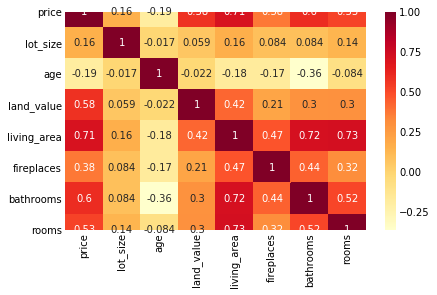

In [12]:
sns.heatmap(data.corr(), annot = True,cmap = 'YlOrRd')

### visualizations

### Price

In [13]:
data['price'].value_counts().head(20)

150000    21
225000    21
120000    21
155000    19
195000    18
145000    17
165000    17
220000    16
180000    15
170000    14
185000    14
135000    14
125000    13
175000    13
255000    12
240000    12
215000    12
140000    12
245000    11
265000    11
Name: price, dtype: int64

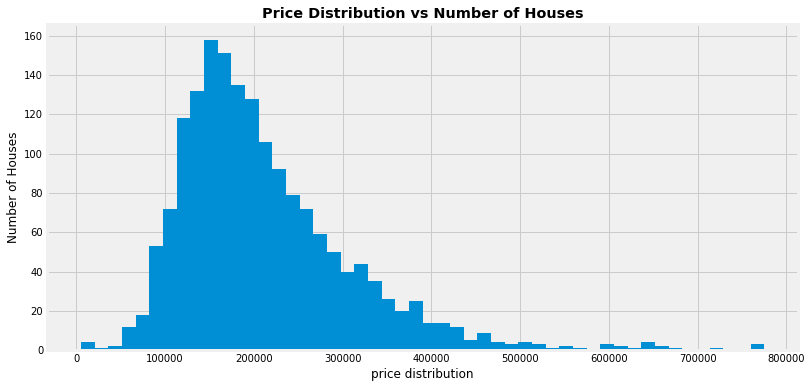

In [14]:
plt.figure(figsize = (12,6))
plt.hist(data['price'],bins = 50)
plt.xlabel("price distribution")
plt.ylabel("Number of Houses")
plt.title("Price Distribution vs Number of Houses",weight = "bold")
plt.show()

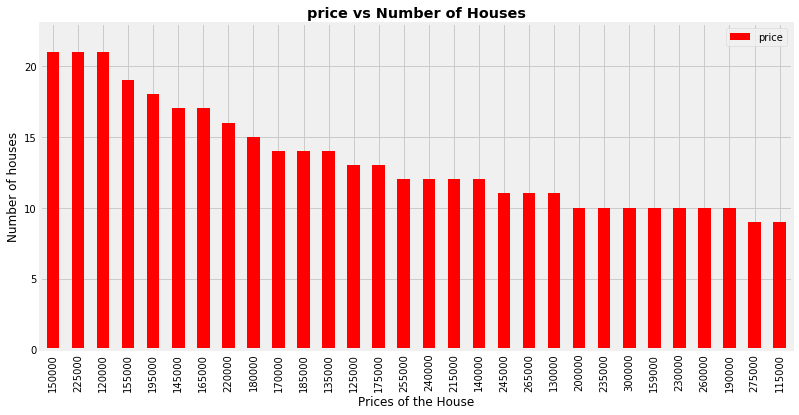

In [15]:
plt.figure(figsize = (12,6))
data['price'].value_counts().head(30).plot(kind='bar',color = 'r')
plt.xlabel("Prices of the House")
plt.ylabel("Number of houses")
plt.title("price vs Number of Houses",weight  = 'bold')
plt.legend()
plt.ylim(0,23)
#plt.gca().set_yticks(data['price'].value_counts().head(30))
plt.show()

In [16]:
data['price'].value_counts().head(30)

150000    21
225000    21
120000    21
155000    19
195000    18
145000    17
165000    17
220000    16
180000    15
170000    14
185000    14
135000    14
125000    13
175000    13
255000    12
240000    12
215000    12
140000    12
245000    11
265000    11
130000    11
200000    10
235000    10
300000    10
159000    10
230000    10
260000    10
190000    10
275000     9
115000     9
Name: price, dtype: int64

In [17]:
data['price'].min()

5000

In [18]:
data['price'].max()

775000

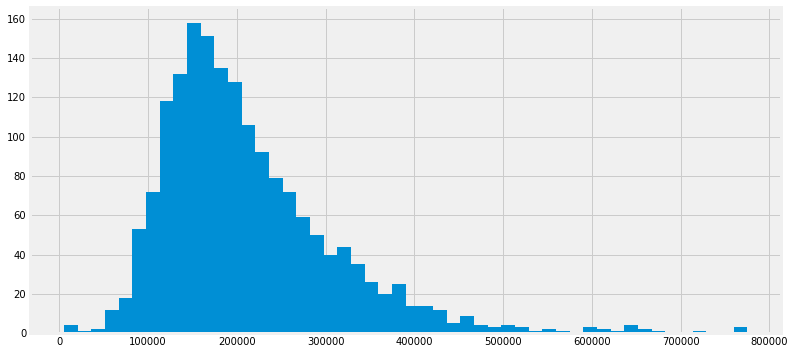

In [19]:
plt.figure(figsize = (12,6))
priceplot = plt.hist(data['price'],bins= 50)

**Note**:-
- we have minimum price value 5000 dollars.
- we have maximum price value with 775000 dollars.
- we have 21 houses for 150000dollars,120000dollars,and 225000dollars.
- you can see the distribution of data how it is spread in above.

### lot size

In [20]:
data['lot_size'].max()

12.2

In [21]:
data['lot_size'].min()

0.0

lot size cant be 0, hence drop the rows

In [22]:
data[data['lot_size'] == 0.0]

,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
15,89900,0.0,No,88,2500,No,No,Gas,Hot Water,Public,936,0,1.0,4
701,775000,0.0,Yes,5,412600,No,Yes,Gas,Hot Air,Private,2472,1,2.5,9


now lets drop them

In [23]:
data.drop(data.index[[15,701]],inplace = True)

now we droped them.

(array([1.646e+03, 3.900e+01, 1.500e+01, 9.000e+00, 6.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e-02, 1.2290e+00, 2.4480e+00, 3.6670e+00, 4.8860e+00,
        6.1050e+00, 7.3240e+00, 8.5430e+00, 9.7620e+00, 1.0981e+01,
        1.2200e+01]),
 <a list of 10 Patch objects>)

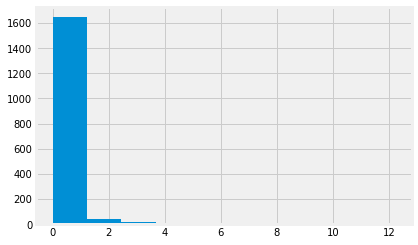

In [24]:
plt.hist(data['lot_size'])

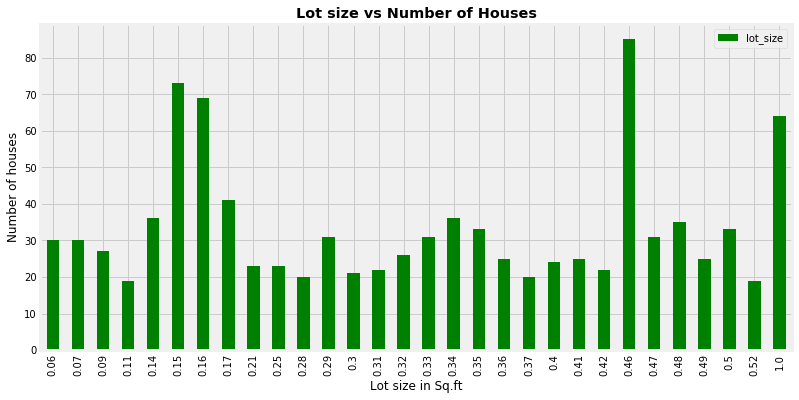

In [25]:
plt.figure(figsize = (12,6))
data['lot_size'].value_counts().head(30).sort_index().plot(kind = 'bar',color = 'g')
plt.xlabel("Lot size in Sq.ft")
plt.ylabel("Number of houses")
plt.title("Lot size vs Number of Houses",weight  = 'bold')
plt.legend()

- we have more number of plots with 0.46 size, i.e morethan 80.

### waterfront

In [26]:
data['waterfront'].value_counts()

No     1705
Yes      14
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'waterfront')

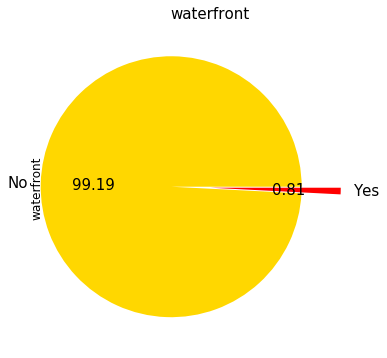

In [27]:
plt.figure(figsize= (12,6))
colors = ('gold','red')
explode = (0.3,0)
data['waterfront'].value_counts().plot(kind = 'pie', autopct='%.2f',explode = explode,colors = colors,fontsize = 15)
plt.title('waterfront',fontsize = 15)

- we have 99.19% houses with no water front.
- we have 0.81% houses with water front which is very less.

### age

In [28]:
data['age'].value_counts().head()

19    93
16    88
18    86
0     83
1     75
Name: age, dtype: int64

In [29]:
data['age'].isna().sum()

0

0 might be a new house.
#we have 0 in value, but we have no null values.

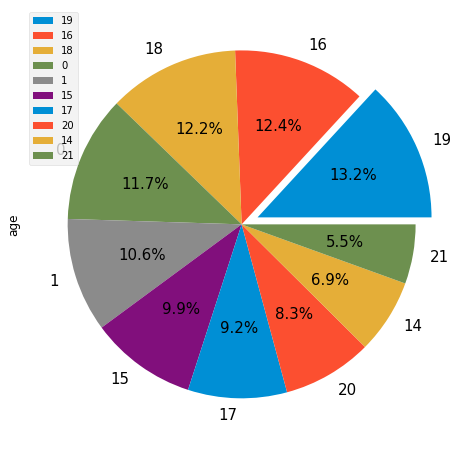

In [30]:
#explode
explodeTuple = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0,)


plt.figure(figsize=(16,8))
locplot = data['age'].value_counts()[:10].plot(kind = 'pie',autopct='%.1f%%',explode = explodeTuple,fontsize = 15)
plt.legend(loc = 2)

#### pie plot with other categories

In [31]:
df1 = pd.DataFrame({'age': data['age'].value_counts()[:10].index,'value' : data['age'].value_counts()[:10].values})

In [32]:
df2 = pd.DataFrame({'age': ['other_ages'],'value' : data['age'].value_counts()[10:].sum()})

In [33]:
new = pd.concat([df1, df2])

In [34]:
new.set_index('age',inplace = True)

<Figure size 864x864 with 0 Axes>

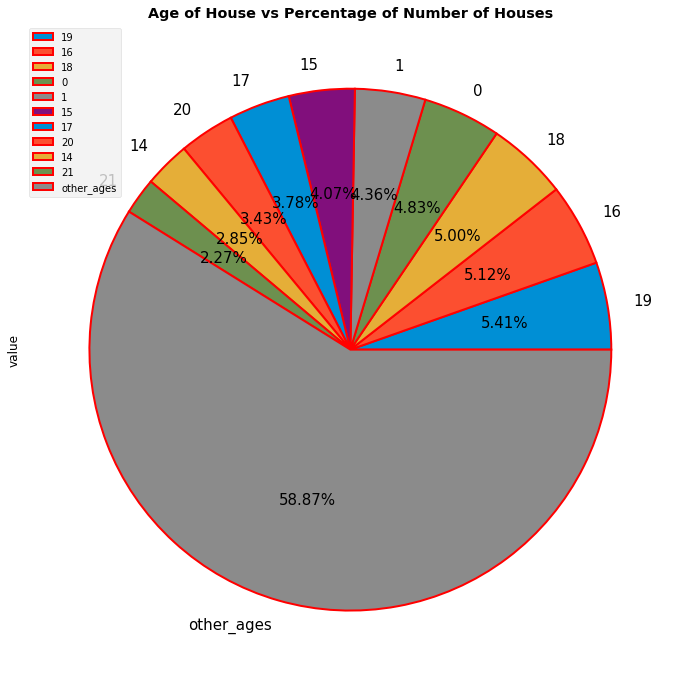

In [35]:
plt.figure(figsize = (12,12))
ax=new.plot(kind = 'pie',y = 'value',autopct='%.2f%%',fontsize = 15,figsize = (12,12),wedgeprops   = { 'linewidth' : 2,'edgecolor' : "red" })
plt.title('Age of House vs Percentage of Number of Houses',weight = 'bold')
plt.show()

In [36]:
data['age'].value_counts().count()

136

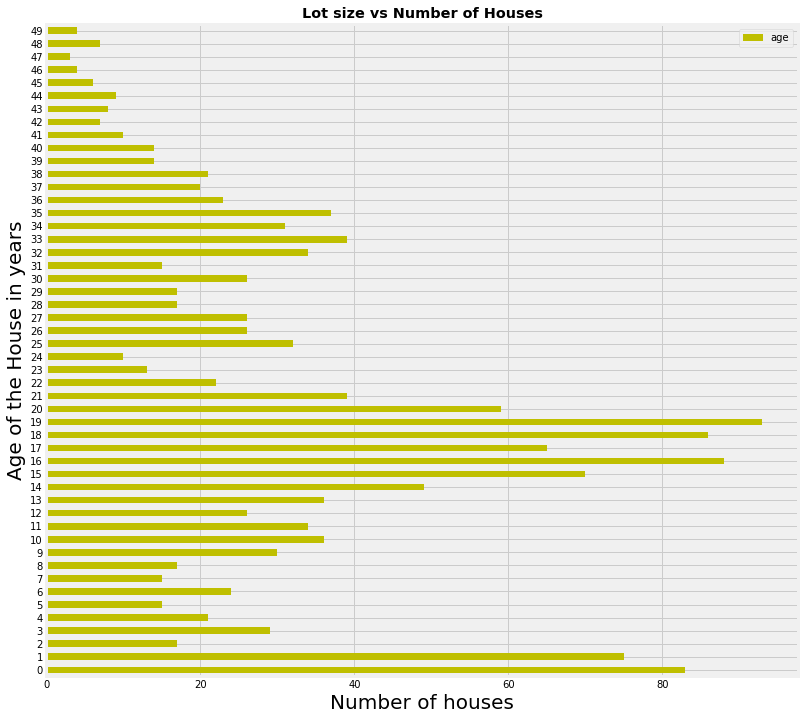

In [37]:
plt.figure(figsize = (12,12))
data['age'].value_counts().sort_index().head(50).plot(kind = 'barh',color = 'y')
plt.xlabel("Number of houses",fontsize = 20)
plt.ylabel("Age of the House in years",fontsize = 20)
plt.title("Lot size vs Number of Houses",weight  = 'bold')
plt.legend()

In [38]:
data['age'].min()

0

In [39]:
data['age'].max()

225

In [41]:
data[data['age']==225]

,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
62,82800,0.11,No,225,3900,No,No,Gas,Hot Air,Public,1483,0,1.0,7


**Note**:- 
- we have maximum age of house is 225.
- we have minimum age of house is 0 that might be a new house.
- we have 13.15 or 93 houses with age 19.

### air condition

In [ ]:
data['air_cond'].value_counts()

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data['air_cond'])

**Note**:-
- we have 633 houses with air condition.
- we have 1086 houses with no air condition.

### fuel

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x="fuel", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 2))

In [ ]:
data['fuel'].value_counts()

**Note**:- 
- we have house with fuel type **Gas** is 1194.
- We have houses with fuel type **Electric** is 309 for heat.
    

### heat

In [ ]:
data['heat'].value_counts()

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data['heat'])

**Note**:-
- we have Heat produced through hot air houses is 1119.
- we have heat produced through how water houses is 301.
- we have electric houses that produce heat is 299.

### sewer

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data['sewer'])

In [ ]:
data['sewer'].value_counts()

- we have house with public sewage system is 1206.
- we have houses with private sewage system is 501.
- we have houses with no sewege system is 12.

### living area

In [ ]:
data['living_area'].value_counts().head(10)

In [ ]:
data['living_area'].min()

In [ ]:
data['living_area'].max()

In [ ]:
plt.figure(figsize = (12,6))
data['living_area'].value_counts().head(10).plot(kind = 'bar',color = 'y')

**Note**:-
- we have 49 houses with 1480 square feet.
- we have 39 houses with 912 square feet.
- we have house with highest living area is 5228 square feet.

### fireplaces

In [ ]:
data['fireplaces'].value_counts()

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data['fireplaces'])

**NOTE**:-
- we have house with 1 fire place are 939.
- 734 houses has no fireplace.
- 42 houses has 2 fireplaces.

### bathrooms

In [ ]:
data['bathrooms'].value_counts()

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data['bathrooms'])

**Note**:-
- we have house with 3 bathrooms are 548, but with no shower or tub.
- we have house with 2 bathrooms are 492 but with no shower of tub.
- 322 houses has shower and tub with 1 bathroom.

### rooms

In [ ]:
data['rooms'].value_counts()

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data['rooms'])

**Note**:-
- we have houses with 7 rooms is 304.
- we have houses with 8 rooms is 258.

###  bivariate analysis

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'rooms', y = 'price', hue = 'bathrooms',data = data,markers = "*")

In [ ]:
fig = plt.figure(figsize=(15,15))


ax = fig.add_subplot(321)
sns.scatterplot(x = 'rooms', y = 'price', hue = 'air_cond',data = data,markers = "*")
plt.title("price vs Rooms with AC ",weight  = 'bold')

ax = fig.add_subplot(322)
sns.scatterplot(x = 'living_area', y = 'price', hue = 'air_cond',style = 'air_cond',data = data,markers = True,)
plt.title("price vs Livingarea with AC",weight  = 'bold')


ax = fig.add_subplot(323)
sns.scatterplot(x = 'living_area', y = 'price', hue = 'heat',data = data,markers = True,)
plt.title("price vs Livingarea with heat ",weight  = 'bold')


ax = fig.add_subplot(324)
sns.scatterplot(x = 'living_area', y = 'price', hue = 'rooms',data = data,markers = True,palette= 'YlOrRd')
plt.title("price vs Livingarea with heat ",weight  = 'bold')



plt.tight_layout()
plt.title("price vs rooms with rooms ",weight  = 'bold')




plt.show()

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'rooms', y = 'price', hue = 'air_cond',data = data,markers = "*")

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'living_area', y = 'price', hue = 'air_cond',style = 'air_cond',data = data,markers = True,)

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'living_area', y = 'price', hue = 'heat',data = data,markers = True,)

In [ ]:
data.groupby('heat')['living_area'].count()/data.shape[0]*100

In [ ]:
data.groupby('heat')['price','living_area'].count()

In [ ]:
firstthousand = data[data['living_area'] < 1000]

In [ ]:
firstthousand.groupby('heat')['living_area'].count()/data.shape[0]*100

In [ ]:
secondthousand = data[data['living_area'] > 1000]

In [ ]:
secondthousand = secondthousand[secondthousand['living_area'] < 2000]

In [ ]:
secondthousand.groupby('heat')['living_area'].count()/data.shape[0]*100

In [ ]:
thirdthousand = data[data['living_area'] >2000]

In [ ]:
thirdthousand = thirdthousand[thirdthousand['living_area'] < 3000]

In [ ]:
thirdthousand.groupby('heat')['living_area'].count()/data.shape[0]*100

In [ ]:
fourthousand = data[data['living_area'] > 3000]

In [ ]:
fourthousand = fourthousand[fourthousand['living_area'] < 4000]

In [ ]:
fourthousand.groupby('heat')['living_area'].count()/data.shape[0]*100

In [ ]:
onetothree = data[data['living_area']> 1000]

In [ ]:
onetothree = onetothree[onetothree['living_area'] < 3000]

In [ ]:
onetothree.groupby('heat')['living_area'].count()/data.shape[0]*100

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'living_area', y = 'price', hue = 'rooms',data = data,markers = True,palette= 'YlOrRd')

In [ ]:
onetothree = data[data['living_area']>= 1000]

In [ ]:
onetothree = onetothree[onetothree['living_area'] <=  3000]

In [ ]:
onetothree.groupby('rooms')['living_area'].count()/data.shape[0]*100

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'living_area', y = 'price', hue = 'fuel',data = data,markers = True,palette= 'viridis')

this shows the relationship between rooms and price.

In [ ]:
sns.pairplot(data)

- from the pair plot you can get insights like
 - lot size increases with increase in price.
 - with increase in living area there is increase in price.

### age vs price

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'age', y = 'price',hue = 'heat', data = data)

- you can see that we have prices decreased with increase in age.
- also you can see houses that are recent has heat through hot air.
- houses that has heat through hot water and electric has age > 10.

### air condition vs price

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'air_cond', y = 'price', data = data)

so you can see that air condition is not effecting the price of house

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'price', y = 'lot_size', hue = 'air_cond', data = data)


with increase in price gets air condition facility.

### heat map

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [ ]:
print(data.corr())

we have no correlation between variables here.

### Model building

In [ ]:
#before encoding
data

In [ ]:
#label encoding
data['waterfront']  = pd.get_dummies(data['waterfront'])
data['construction'] = pd.get_dummies(data['construction'])
data['air_cond'] = pd.get_dummies(data['air_cond'])

In [ ]:
#onehot encoding
#from sklearn.preprocessing import OneHotEncoder
#ohe  = OneHotEncoder()
fueltype = pd.get_dummies(data['fuel'])
heattype = pd.get_dummies(data['heat'])
sewagetype = pd.get_dummies(data['sewer'])

In [ ]:
final=pd.concat([data,fueltype,heattype,sewagetype],axis=1)

In [ ]:
final.drop(['fuel','heat','sewer'],axis =1,inplace = True)

In [ ]:
#final dataset after encoding
final

### split the dataset

In [ ]:
X = final.drop('price',axis = 1)
y  = data['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

### model building

### linear regresssion

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)*100

### random forest

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [ ]:
rfr.score(X_test,y_test)*100

### RIDGE

In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [ ]:
rdg.score(X_test,y_test)*100

### lasso model

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [ ]:
ls.score(X_test,y_test)*100

In [ ]:
X_train.head()

## lets apply standard scalar

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

I have huge y_train values in lakhs. do i have to scale them as whole dataset., what actuallly happening here is model fitting ytrain using xtrain values, and predicts ytrain using xtest.

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)*100

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
#how fit our model
r2_score(y_test, y_pred_lr)

In [ ]:
#error
mean_squared_error(y_test, y_pred_lr)

In [ ]:
#random forest
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [ ]:
rfr.score(X_test,y_test)*100

In [ ]:
#ridge
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [ ]:
rdg.score(X_test,y_test)*100

In [ ]:
#lasso
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [ ]:
ls.score(X_test,y_test)*100

# Cross validation

#### k-fold

In [ ]:
# You will need the following dependencies for applying Cross-validation and evaluating the cross-validated score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 5, random_state=60)

result = cross_val_score(lr, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 3, random_state= 10)

result = cross_val_score(rdg, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 4, random_state= 10)

result = cross_val_score(rfr, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#k fold
# Build the k-fold cross-validator
kfold = KFold(n_splits= 9, random_state= 55)

result = cross_val_score(ls, X_test, y_test, cv=kfold, scoring=None)
print(result.mean())

- rfr increased from 62 to 63.
- and there is no other change in remaining algorithm accuracy.

### Actual vs predicted

In [ ]:
output = pd.DataFrame({'actual':y_test, 'predicted':y_pred_ls})

In [ ]:
output